# Data Wrangling Project from WeRateDogs Twitter account 

### Data Wrangling Process 
#### Data Wrangling steps
- Gather
- Assess
- Clean

### Content 
- 1. Data Gatharing
- 2. Data Assessing 
- 3. Clean
- 4. Insights & Visualization

## 1. Data Gatharing  

In [1]:
import pandas as pd
import numpy as np 
import requests
import tweepy
import json 
import os
from timeit import default_timer as timer

##### 1. Gatharing data from twitter archive enhanced table

In [2]:
df_tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')

#### 2. Gathering data programmatically from url using requests library

In [3]:
folder_name='image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)
os.listdir(folder_name)

['image-predictions.tsv']

In [4]:
#text file 's data frame'
df_image_pred =pd.read_csv('image-predictions.tsv', sep='\t')
tweet_ids=df_image_pred['tweet_id']

#### 4. Gathring data from twitter

- Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

 > tweet ID, retweet count, and favorite count

In [5]:
consumer_key = 'XXG5RE7jbwmYIs8N2kbACXTOX'
consumer_secret = 'Owl8KuNTJTNVTCqC8c9GJwQTwxGE1G0MfKm6weR6vXKjwhb3xM'
access_token = '836552207126396929-lelWw5UEPbRkPaf1oYABdVZfFXLDour'
access_token_secret = 'INRplVTPbeYbDmjHfcLHobpsULHTKb2JqcP2kUqHKGKNy'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [13]:
tweet_id_copy = df_tweet_archive['tweet_id']

In [14]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_id_copy:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            fails_dict[tweet_id] = e
            pass
end = timer()


1: 892420643555336193
2: 892177421306343426
3: 891815181378084864
4: 891689557279858688
5: 891327558926688256
6: 891087950875897856
7: 890971913173991426
8: 890729181411237888
9: 890609185150312448
10: 890240255349198849
11: 890006608113172480
12: 889880896479866881
13: 889665388333682689
14: 889638837579907072
15: 889531135344209921
16: 889278841981685760
17: 888917238123831296
18: 888804989199671297
19: 888554962724278272
20: 888202515573088257
21: 888078434458587136
22: 887705289381826560
23: 887517139158093824
24: 887473957103951883
25: 887343217045368832
26: 887101392804085760
27: 886983233522544640
28: 886736880519319552
29: 886680336477933568
30: 886366144734445568
31: 886267009285017600
32: 886258384151887873
33: 886054160059072513
34: 885984800019947520
35: 885528943205470208
36: 885518971528720385
37: 885311592912609280
38: 885167619883638784
39: 884925521741709313
40: 884876753390489601
41: 884562892145688576
42: 884441805382717440
43: 884247878851493888
44: 8841626705843773

347: 831926988323639298
348: 831911600680497154
349: 831670449226514432
350: 831650051525054464
351: 831552930092285952
352: 831322785565769729
353: 831315979191906304
354: 831309418084069378
355: 831262627380748289
356: 830956169170665475
357: 830583320585068544
358: 830173239259324417
359: 830097400375152640
360: 829878982036299777
361: 829861396166877184
362: 829501995190984704
363: 829449946868879360
364: 829374341691346946
365: 829141528400556032
366: 829011960981237760
367: 828801551087042563
368: 828770345708580865
369: 828708714936930305
370: 828650029636317184
371: 828409743546925057
372: 828408677031882754
373: 828381636999917570
374: 828376505180889089
375: 828372645993398273
376: 828361771580813312
377: 828046555563323392
378: 828011680017821696
379: 827933404142436356
380: 827653905312006145
381: 827600520311402496
382: 827324948884643840
383: 827228250799742977
384: 827199976799354881
385: 826958653328592898
386: 826848821049180160
387: 826615380357632002
388: 82659879982

689: 787810552592695296
690: 787717603741622272
691: 787397959788929025
692: 787322443945877504
693: 787111942498508800
694: 786963064373534720
695: 786729988674449408
696: 786709082849828864
697: 786664955043049472
698: 786595970293370880
699: 786363235746385920
700: 786286427768250368
701: 786233965241827333
702: 786051337297522688
703: 786036967502913536
704: 785927819176054784
705: 785872687017132033
706: 785639753186217984
707: 785533386513321988
708: 785515384317313025
709: 785264754247995392
710: 785170936622350336
711: 784826020293709826
712: 784517518371221505
713: 784431430411685888
714: 784183165795655680
715: 784057939640352768
716: 783839966405230592
717: 783821107061198850
718: 783695101801398276
719: 783466772167098368
720: 783391753726550016
721: 783347506784731136
722: 783334639985389568
723: 783085703974514689
724: 782969140009107456
725: 782747134529531904
726: 782722598790725632
727: 782598640137187329
728: 782305867769217024
729: 782021823840026624
730: 78195520344

1030: 745712589599014916
1031: 745433870967832576
1032: 745422732645535745
1033: 745314880350101504
1034: 745074613265149952
1035: 745057283344719872
1036: 744995568523612160
1037: 744971049620602880
1038: 744709971296780288
1039: 744334592493166593
1040: 744234799360020481
1041: 744223424764059648
1042: 743980027717509120
1043: 743895849529389061
1044: 743835915802583040
1045: 743609206067040256
1046: 743595368194129920
1047: 743545585370791937
1048: 743510151680958465
1049: 743253157753532416
1050: 743222593470234624
1051: 743210557239623680
1052: 742534281772302336
1053: 742528092657332225
1054: 742465774154047488
1055: 742423170473463808
1056: 742385895052087300
1057: 742161199639494656
1058: 742150209887731712
1059: 741793263812808706
1060: 741743634094141440
1061: 741438259667034112
1062: 741303864243200000
1063: 741099773336379392
1064: 741067306818797568
1065: 740995100998766593
1066: 740711788199743490
1067: 740699697422163968
1068: 740676976021798912
1069: 740373189193256964


1364: 702932127499816960
1365: 702899151802126337
1366: 702684942141153280
1367: 702671118226825216
1368: 702598099714314240
1369: 702539513671897089
1370: 702332542343577600
1371: 702321140488925184
1372: 702276748847800320
1373: 702217446468493312
1374: 701981390485725185
1375: 701952816642965504
1376: 701889187134500865
1377: 701805642395348998
1378: 701601587219795968
1379: 701570477911896070
1380: 701545186879471618
1381: 701214700881756160
1382: 700890391244103680
1383: 700864154249383937
1384: 700847567345688576
1385: 700796979434098688
1386: 700747788515020802
1387: 700518061187723268
1388: 700505138482569216
1389: 700462010979500032
1390: 700167517596164096
1391: 700151421916807169
1392: 700143752053182464
1393: 700062718104104960
1394: 700029284593901568
1395: 700002074055016451
1396: 699801817392291840
1397: 699788877217865730
1398: 699779630832685056
1399: 699775878809702401
1400: 699691744225525762
1401: 699446877801091073
1402: 699434518667751424
1403: 699423671849451520


1730: 679862121895714818
1731: 679854723806179328
1732: 679844490799091713
1733: 679828447187857408
1734: 679777920601223168
1735: 679736210798047232
1736: 679729593985699840
1737: 679722016581222400
1738: 679530280114372609
1739: 679527802031484928
1740: 679511351870550016
1741: 679503373272485890
1742: 679475951516934144
1743: 679462823135686656
1744: 679405845277462528
1745: 679158373988876288
1746: 679148763231985668
1747: 679132435750195208
1748: 679111216690831360
1749: 679062614270468097
1750: 679047485189439488
1751: 679001094530465792
1752: 678991772295516161
1753: 678969228704284672
1754: 678800283649069056
1755: 678798276842360832
1756: 678774928607469569
1757: 678767140346941444
1758: 678764513869611008
1759: 678755239630127104
1760: 678740035362037760
1761: 678708137298427904
1762: 678675843183484930
1763: 678643457146150913
1764: 678446151570427904
1765: 678424312106393600
1766: 678410210315247616
1767: 678399652199309312
1768: 678396796259975168
1769: 678389028614488064


2073: 671109016219725825
2074: 670995969505435648
2075: 670842764863651840
2076: 670840546554966016
2077: 670838202509447168
2078: 670833812859932673
2079: 670832455012716544
2080: 670826280409919488
2081: 670823764196741120
2082: 670822709593571328
2083: 670815497391357952
2084: 670811965569282048
2085: 670807719151067136
2086: 670804601705242624
2087: 670803562457407488
2088: 670797304698376195
2089: 670792680469889025
2090: 670789397210615808
2091: 670786190031921152
2092: 670783437142401025
2093: 670782429121134593
2094: 670780561024270336
2095: 670778058496974848
2096: 670764103623966721
2097: 670755717859713024
2098: 670733412878163972
2099: 670727704916926465
2100: 670717338665226240
2101: 670704688707301377
2102: 670691627984359425
2103: 670679630144274432
2104: 670676092097810432
2105: 670668383499735048
2106: 670474236058800128
2107: 670468609693655041
2108: 670465786746662913
2109: 670452855871037440
2110: 670449342516494336
2111: 670444955656130560
2112: 670442337873600512


##### tweet_data = id, retweet_count, favorite_count

In [57]:
status = []
with open('tweet_json .txt', 'r') as file:
    for line in file:
        status.append(json.loads(line))

In [58]:
list_tweet_id = []
list_retweet_count = []
list_favorite_count = []
for tweet in status:
    tweet_id = tweet['id']
    list_tweet_id.append(tweet_id)
    retweet_count = tweet['retweet_count']
    list_retweet_count.append(retweet_count)
    favorite_count = tweet['favorite_count']
    list_favorite_count.append(favorite_count)
    df_tweet = pd.DataFrame(data = {'tweet_id':list_tweet_id,
                                                'retweet_count':list_retweet_count,
                                                'favorite_count':list_favorite_count})

In [59]:
df_tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7989,37295
1,892177421306343426,5931,32069
2,891815181378084864,3919,24170
3,891689557279858688,8143,40608
4,891327558926688256,8820,38844
5,891087950875897856,2936,19513
6,890971913173991426,1946,11399
7,890729181411237888,17799,62897
8,890609185150312448,4035,26855
9,890240255349198849,6951,30761


# 2. Data Assessing  

##### df_tweet_archive table

In [60]:
df_tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [61]:
df_tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [62]:
df_tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [63]:
df_tweet_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
737,780858289093574656,NaN,NaN,2016-09-27 19:54:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dash. He's very stylish, but also incr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/780858289...,10,10,Dash,None,None,None,None
2147,669753178989142016,NaN,NaN,2015-11-26 05:42:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chester. He just ate a lot and now he can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669753178...,10,10,Chester,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150...,11,10,a,None,None,None,None
333,832757312314028032,NaN,NaN,2017-02-18 01:03:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Willow. She's the official strawberry ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832757312...,13,10,Willow,None,None,None,None
1851,675710890956750848,NaN,NaN,2015-12-12 16:16:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lenny. He was just told that he couldn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675710890...,12,10,Lenny,None,None,None,None
2004,672466075045466113,NaN,NaN,2015-12-03 17:23:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franq and Pablo. They're working hard ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672466075...,12,10,Franq,None,None,None,None
1839,675891555769696257,NaN,NaN,2015-12-13 04:14:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Donny. He's summoning the demon monste...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675891555...,6,10,Donny,None,None,None,None
239,846874817362120707,NaN,NaN,2017-03-29 00:01:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Tuck. As you can see, he's rather h*ck...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/846874817...,13,10,Tuck,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None


- Missing values (NaN) in expanded_urls
- Null represintade as (None) in name column 
- in name [a, an, the]
- drop null raws
- in timestamp column >> sperate date and time
- drop [doggo, floofer, pupper, puppo] columns
- drop [in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp] columns
- timestamp object type should be date / time 
- outliers in rating_numerator and rating_denominator columns 

In [64]:
# data completnace error
df_tweet_archive[df_tweet_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


##### df_image_pred table

In [65]:
df_image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [66]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [67]:
df_image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [68]:
df_image_pred.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Maltese_dog                   18
Shetland_sheepdog             18
beagle                        18
teddy                         18
Eskimo_dog                    18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [69]:
df_image_pred[df_image_pred['p1'].isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [70]:
df_image_pred.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
Eskimo_dog                         27
collie                             27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
toy_terrier                        20
miniature_pinscher                 20
Samoyed                            20
malinois                           20
chow                               20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [71]:
df_image_pred.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pomeranian                        29
Pekinese                          29
toy_poodle                        29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

- rename columns name [p1,p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog] 
- invalid dogs breed name

In [72]:
mylist1 = list(df_image_pred['p1'])
mylist1 = list(dict.fromkeys(mylist1))

In [73]:
mylist1

['Welsh_springer_spaniel',
 'redbone',
 'German_shepherd',
 'Rhodesian_ridgeback',
 'miniature_pinscher',
 'Bernese_mountain_dog',
 'box_turtle',
 'chow',
 'shopping_cart',
 'miniature_poodle',
 'golden_retriever',
 'Gordon_setter',
 'Walker_hound',
 'pug',
 'bloodhound',
 'Lhasa',
 'English_setter',
 'hen',
 'desktop_computer',
 'Italian_greyhound',
 'Maltese_dog',
 'three-toed_sloth',
 'ox',
 'malamute',
 'guinea_pig',
 'soft-coated_wheaten_terrier',
 'Chihuahua',
 'black-and-tan_coonhound',
 'coho',
 'toy_terrier',
 'Blenheim_spaniel',
 'Pembroke',
 'llama',
 'Chesapeake_Bay_retriever',
 'curly-coated_retriever',
 'dalmatian',
 'Ibizan_hound',
 'Border_collie',
 'Labrador_retriever',
 'seat_belt',
 'snail',
 'miniature_schnauzer',
 'Airedale',
 'triceratops',
 'swab',
 'hay',
 'hyena',
 'jigsaw_puzzle',
 'West_Highland_white_terrier',
 'toy_poodle',
 'giant_schnauzer',
 'vizsla',
 'vacuum',
 'Rottweiler',
 'Siberian_husky',
 'teddy',
 'papillon',
 'Saint_Bernard',
 'porcupine',
 'go

In [74]:
len(mylist1)

378

##### df_tweet table

In [75]:
df_tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7989,37295
1,892177421306343426,5931,32069
2,891815181378084864,3919,24170
3,891689557279858688,8143,40608
4,891327558926688256,8820,38844
5,891087950875897856,2936,19513
6,890971913173991426,1946,11399
7,890729181411237888,17799,62897
8,890609185150312448,4035,26855
9,890240255349198849,6951,30761


In [76]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1778 entries, 0 to 1777
Data columns (total 3 columns):
tweet_id          1778 non-null int64
retweet_count     1778 non-null int64
favorite_count    1778 non-null int64
dtypes: int64(3)
memory usage: 41.8 KB


- tweet_id = 1778

In [77]:
df_tweet.describe()

,tweet_id,retweet_count,favorite_count
count,1.778000e+03,1778.000000,1778.000000
mean,7.509689e+17,3092.832958,8707.889764
std,7.349609e+16,4668.407584,12501.151486
min,6.692142e+17,1.000000,0.000000
25%,6.798470e+17,627.250000,1491.500000
50%,7.084354e+17,1535.000000,3420.000000
75%,8.177174e+17,3687.250000,11641.750000
max,8.924206e+17,58788.000000,137318.000000


In [78]:
df_tweet[df_tweet['favorite_count'].isnull()]

,tweet_id,retweet_count,favorite_count


## Data quality dimentions 
- 1. Completeness 
- 2. Validity 
- 3. Accuracy 
- 4. Consistancy 
- eight (8) quality issues and two (2) tidiness issues

### Quality

##### 1. twitter_archive_enhanced table

- Missing values (NaN) in expanded_urls
- Null represintade as (None) in name column
- in name [a, an, the]
- drop null raws
- outliers in rating_numerator and rating_denominator columns 

##### 2. image_predictions table

- rename columns name [p1,p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog] 
- Only have 2075  tweet_id

###### 3. de_tweet table

- I only have get 1777 tweets

###### 4. de_final table

- Drop null rows

### Tidiness
- It is stractural issues 
- 1. Each variable forms a column.
- 2. Each observation forms a raw.
- 3. Each observation forms a table.


##### 1. twitter_archive_enhanced table

- drop [doggo, floofer, pupper, puppo] columns
- drop [in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp] columns
- split date and time in timestamp column
- All data in one table (df_final), the final table should include [tweet_id, favorate_count, retweet_cont, dog_breed, time, date, rating_numerator, rating_denominator] in the same dataframe  

# 3. Clean

The final table should include [tweet_id, favorate_count, dog_breed, time, date] in the same dataframe

##### 3.1 Define

- 1. Merge final table >> I only have 1777 tweets 
- 2. Drop [doggo, floofer, pupper, puppo, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp] columns 
- 3. Drop null data
- 4. Remove +0000 in timestamp and split the column into date and time
- 5. Remove [None, a, the] from name column
- 6. Change date and time columns data type
- 7. Changing columns name {p1:predection1 ,p1_conf: confidance_value1, p1_dog: Is_it_dog1 , p2: predection2, p2_conf: confidance_value2, p2_dog; Is_it_dog2, p3: predection3, p3_conf: confidance_value3 , p3_dog: Is_it_dog3} 

##### 3.2 Code 

In [79]:
# Merge final table
df = pd.merge(df_tweet, df_image_pred, on='tweet_id',how='left')

In [80]:
df_final = pd.merge(df, df_tweet_archive, on='tweet_id',how='left')

In [81]:
df_final

,tweet_id,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,...,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,7989,37295,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,5931,32069,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,...,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,3919,24170,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,8143,40608,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,...,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,8820,38844,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,...,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2936,19513,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,...,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,1946,11399,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,...,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,17799,62897,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,...,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,4035,26855,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,...,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,6951,30761,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,True,Cardigan,0.451038,...,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [82]:
# Drop [doggo, floofer, pupper, puppo, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp] columns 
df_final = df_final.drop(['p2', 'p2_conf','p2_dog','p3','p3_conf','p3_dog',
                          'in_reply_to_status_id','text','jpg_url','img_num','source','expanded_urls', 
                          'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
                          'retweeted_status_timestamp' , 'doggo', 'floofer', 'pupper', 'puppo'], axis= 1)

In [83]:
df_final

,tweet_id,retweet_count,favorite_count,p1,p1_conf,p1_dog,timestamp,rating_numerator,rating_denominator,name
0,892420643555336193,7989,37295,orange,0.097049,False,2017-08-01 16:23:56 +0000,13,10,Phineas
1,892177421306343426,5931,32069,Chihuahua,0.323581,True,2017-08-01 00:17:27 +0000,13,10,Tilly
2,891815181378084864,3919,24170,Chihuahua,0.716012,True,2017-07-31 00:18:03 +0000,12,10,Archie
3,891689557279858688,8143,40608,paper_towel,0.170278,False,2017-07-30 15:58:51 +0000,13,10,Darla
4,891327558926688256,8820,38844,basset,0.555712,True,2017-07-29 16:00:24 +0000,12,10,Franklin
5,891087950875897856,2936,19513,Chesapeake_Bay_retriever,0.425595,True,2017-07-29 00:08:17 +0000,13,10,None
6,890971913173991426,1946,11399,Appenzeller,0.341703,True,2017-07-28 16:27:12 +0000,13,10,Jax
7,890729181411237888,17799,62897,Pomeranian,0.566142,True,2017-07-28 00:22:40 +0000,13,10,None
8,890609185150312448,4035,26855,Irish_terrier,0.487574,True,2017-07-27 16:25:51 +0000,13,10,Zoey
9,890240255349198849,6951,30761,Pembroke,0.511319,True,2017-07-26 15:59:51 +0000,14,10,Cassie


In [84]:
# Remove +0000 in timestamp and split the column into date and time 
df_final['date']= df_final['timestamp'].str[:10]
df_final['time'] = df_final['timestamp'].str[11:19]

In [85]:
df_final = df_final.drop('timestamp', axis = 1)

In [86]:
# Calcolate average rating_numerator and rating_denominator
df_final['avg'] = (df_final['rating_numerator']+df_final['rating_denominator'])/2

In [87]:
# change date and time columns data type
df_final['date'] =  pd.to_datetime(df_final['date'], format='%Y-%m-%d')
df_final['time'] =  pd.to_datetime(df_final['time'], format='%H:%M:%S')

In [88]:
# Split day, month and year
df_final['day'] = df_final['date'].dt.day_name()
df_final['month'] = df_final['date'].dt.month_name()
df_final['year'] = pd.DatetimeIndex(df_final['date']).year
df_final['hour'] = pd.DatetimeIndex(df_final['time']).hour

In [89]:
# find follower engagment (favorite_count+retweet_count)
df_final['followers_engagement'] = df_final['favorite_count'] + df_final['retweet_count']

In [90]:
# Changing columns name {p1:predection1 ,p1_conf: confidance_value1, p1_dog: Is_it_dog1 , p2: predection2, p2_conf: confidance_value2, p2_dog; Is_it_dog2, p3: predection3, p3_conf: confidance_value3 , p3_dog: Is_it_dog3} 
df_final = df_final.rename(columns={'p1':'predection1','p1_conf': 'confidance_value1', 'p1_dog': 'Is_it_dog1' , 
 'p2': 'predection2', 'p2_conf': 'confidance_value2', 'p2_dog':'Is_it_dog2', 
 'p3': 'predection3', 'p3_conf': 'confidance_value3' , 'p3_dog': 'Is_it_dog3'})

In [91]:
#  Cleannig of dogs name in preduction1 column 
phrases  = ['orange', 'computer_desk', 'tricycle', 'laptop', 'barbell', 'tricycle' , 'pencil_box', 'basketball', 'pole', 
               'box_turtle', 'ox', 'web_site', 'electric_fan', 'jellyfish', 'candle', 'bow_tie', 'window_shade', 
               'ping-pong_ball', 'comic_book', 'car_mirror', "jack-o'-lantern", 'banana', 'microphone', 'cup', 
               'coffee_mug', 'limousine', 'convertible', 'syringe', 'envelope','revolver', 'microphone', 'ocarina','dumber',
            'swing', 'Arabian_camel']
for ch in phrases:
    df_final.loc[df_final.predection1 == ch,'predection1'] = "NaN"


In [92]:
#  Delete incorecte dogs name in preduction1 column 
df_final = df_final[df_final.predection1 != "NaN"]

In [93]:
df_final.head(5)

,tweet_id,retweet_count,favorite_count,predection1,confidance_value1,Is_it_dog1,rating_numerator,rating_denominator,name,date,time,avg,day,month,year,hour,followers_engagement
1,892177421306343426,5931,32069,Chihuahua,0.323581,True,13,10,Tilly,2017-08-01,1900-01-01 00:17:27,11.5,Tuesday,August,2017,0,38000
2,891815181378084864,3919,24170,Chihuahua,0.716012,True,12,10,Archie,2017-07-31,1900-01-01 00:18:03,11.0,Monday,July,2017,0,28089
3,891689557279858688,8143,40608,paper_towel,0.170278,False,13,10,Darla,2017-07-30,1900-01-01 15:58:51,11.5,Sunday,July,2017,15,48751
4,891327558926688256,8820,38844,basset,0.555712,True,12,10,Franklin,2017-07-29,1900-01-01 16:00:24,11.0,Saturday,July,2017,16,47664
5,891087950875897856,2936,19513,Chesapeake_Bay_retriever,0.425595,True,13,10,None,2017-07-29,1900-01-01 00:08:17,11.5,Saturday,July,2017,0,22449


In [94]:
df_final[df_final['predection1'].isnull()]

,tweet_id,retweet_count,favorite_count,predection1,confidance_value1,Is_it_dog1,rating_numerator,rating_denominator,name,date,time,avg,day,month,year,hour,followers_engagement
29,886267009285017600,4,116,NaN,NaN,NaN,12,10,None,2017-07-15,1900-01-01 16:51:35,11.0,Saturday,July,2017,16,120
31,886054160059072513,104,0,NaN,NaN,NaN,12,10,None,2017-07-15,1900-01-01 02:45:48,11.0,Saturday,July,2017,2,104
34,885518971528720385,3513,19726,NaN,NaN,NaN,14,10,None,2017-07-13,1900-01-01 15:19:09,12.0,Thursday,July,2017,15,23239
41,884247878851493888,19198,70252,NaN,NaN,NaN,13,10,None,2017-07-10,1900-01-01 03:08:17,11.5,Monday,July,2017,3,89450
54,881633300179243008,7,122,NaN,NaN,NaN,17,10,None,2017-07-02,1900-01-01 21:58:53,13.5,Sunday,July,2017,21,129
63,879674319642796034,10,302,NaN,NaN,NaN,14,10,None,2017-06-27,1900-01-01 12:14:36,12.0,Tuesday,June,2017,12,312
67,879130579576475649,6445,0,NaN,NaN,NaN,14,10,Emmy,2017-06-26,1900-01-01 00:13:58,12.0,Monday,June,2017,0,6445
71,878604707211726852,6755,29149,NaN,NaN,NaN,13,10,None,2017-06-24,1900-01-01 13:24:20,11.5,Saturday,June,2017,13,35904
72,878404777348136964,1224,0,NaN,NaN,NaN,13,10,Shadow,2017-06-24,1900-01-01 00:09:53,11.5,Saturday,June,2017,0,1224
73,878316110768087041,6324,0,NaN,NaN,NaN,11,10,Terrance,2017-06-23,1900-01-01 18:17:33,10.5,Friday,June,2017,18,6324


### 3.3 Test 

In [95]:
df_final

,tweet_id,retweet_count,favorite_count,predection1,confidance_value1,Is_it_dog1,rating_numerator,rating_denominator,name,date,time,avg,day,month,year,hour,followers_engagement
1,892177421306343426,5931,32069,Chihuahua,0.323581,True,13,10,Tilly,2017-08-01,1900-01-01 00:17:27,11.5,Tuesday,August,2017,0,38000
2,891815181378084864,3919,24170,Chihuahua,0.716012,True,12,10,Archie,2017-07-31,1900-01-01 00:18:03,11.0,Monday,July,2017,0,28089
3,891689557279858688,8143,40608,paper_towel,0.170278,False,13,10,Darla,2017-07-30,1900-01-01 15:58:51,11.5,Sunday,July,2017,15,48751
4,891327558926688256,8820,38844,basset,0.555712,True,12,10,Franklin,2017-07-29,1900-01-01 16:00:24,11.0,Saturday,July,2017,16,47664
5,891087950875897856,2936,19513,Chesapeake_Bay_retriever,0.425595,True,13,10,None,2017-07-29,1900-01-01 00:08:17,11.5,Saturday,July,2017,0,22449
6,890971913173991426,1946,11399,Appenzeller,0.341703,True,13,10,Jax,2017-07-28,1900-01-01 16:27:12,11.5,Friday,July,2017,16,13345
7,890729181411237888,17799,62897,Pomeranian,0.566142,True,13,10,None,2017-07-28,1900-01-01 00:22:40,11.5,Friday,July,2017,0,80696
8,890609185150312448,4035,26855,Irish_terrier,0.487574,True,13,10,Zoey,2017-07-27,1900-01-01 16:25:51,11.5,Thursday,July,2017,16,30890
9,890240255349198849,6951,30761,Pembroke,0.511319,True,14,10,Cassie,2017-07-26,1900-01-01 15:59:51,12.0,Wednesday,July,2017,15,37712
10,890006608113172480,6909,29590,Samoyed,0.957979,True,13,10,Koda,2017-07-26,1900-01-01 00:31:25,11.5,Wednesday,July,2017,0,36499


In [96]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1723 entries, 1 to 1777
Data columns (total 17 columns):
tweet_id                1723 non-null int64
retweet_count           1723 non-null int64
favorite_count          1723 non-null int64
predection1             1496 non-null object
confidance_value1       1496 non-null float64
Is_it_dog1              1496 non-null object
rating_numerator        1723 non-null int64
rating_denominator      1723 non-null int64
name                    1723 non-null object
date                    1723 non-null datetime64[ns]
time                    1723 non-null datetime64[ns]
avg                     1723 non-null float64
day                     1723 non-null object
month                   1723 non-null object
year                    1723 non-null int64
hour                    1723 non-null int64
followers_engagement    1723 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(8), object(5)
memory usage: 242.3+ KB


# 4. Insights & Visualization 

- Which dog breed have max rating_numerator?
- Which dog breed have max rating_denominator?
- Which mean dog breeds have hieghest rating_numerator and rating_denominator average?
- Which dog breed have the most favorite_count?
- What is the rate of favorite_count over time?
- Which day has the highest followers engagement (favorite_count and retweet_count average)?


##### Which dogs breed have max rating_numerator?

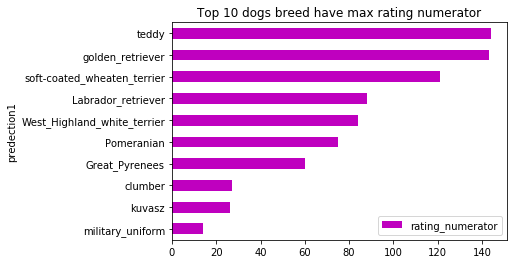

In [97]:
df_final.filter(['predection1','rating_numerator']).dropna().groupby(['predection1']).max().sort_values(by = 'rating_numerator').tail(10).plot(kind= 'barh', color = 'm', title= 'Top 10 dogs breed have max rating numerator' )

##### Which dogs breed have max rating_denominator?

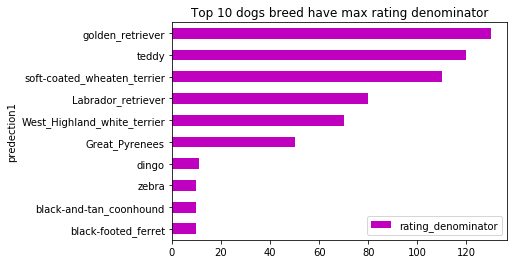

In [98]:
df_final.filter(['predection1','rating_denominator']).dropna().groupby(['predection1']).max().sort_values(by = 'rating_denominator').tail(10).plot(kind='barh',
color="m", title= 'Top 10 dogs breed have max rating denominator' )

##### Which dogs breed have max avg?

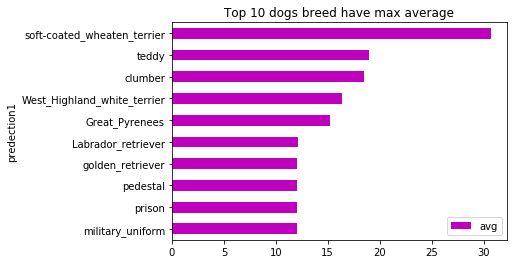

In [99]:
df_final.filter(['predection1','avg']).dropna().groupby(['predection1']).mean().sort_values(by = 'avg').tail(10).plot(kind='barh',
color="m", title= 'Top 10 dogs breed have max average')

##### Which dogs breed have the most followers_engagement?

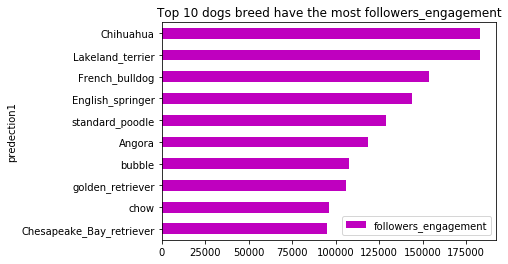

In [100]:
df_final.filter(['followers_engagement', 'predection1']).dropna().groupby(['predection1']).max().sort_values(by = 'followers_engagement').tail(10).plot(kind='barh',
color="m", title= 'Top 10 dogs breed have the most followers_engagement')

##### What is the rate of followers_engagement  (favorite_count and retweet_count average) over month?

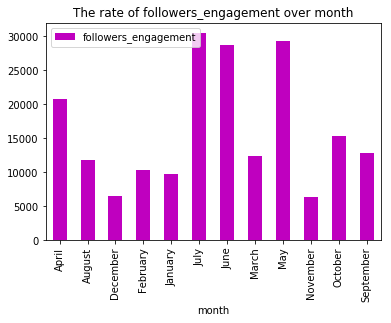

In [101]:
df_final.filter(['followers_engagement', 'month']).dropna().groupby(['month']).mean().plot(kind = 'bar', color="m",title= 'The rate of followers_engagement over month' )

##### Which day has the highest followers engagement (favorite_count and retweet_count average)?

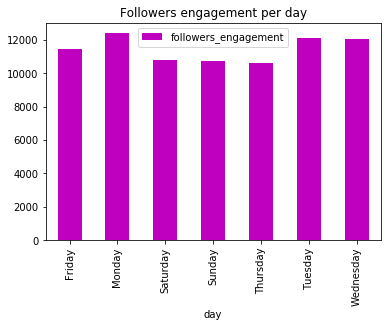

In [102]:
df_final.filter(['followers_engagement', 'day']).dropna().groupby(['day']).mean().plot(kind='bar', color="m", title = 'Followers engagement per day')

##### Which hour has the highest followers engagement (favorite_count and retweet_count average)?

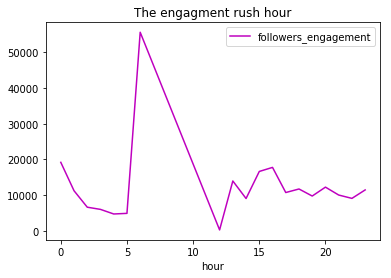

In [103]:
df_final.filter(['followers_engagement', 'hour']).dropna().groupby(['hour']).mean().plot(color="m", title = 'The engagment rush hour')

##### What is the rate of followers_engagement over year?

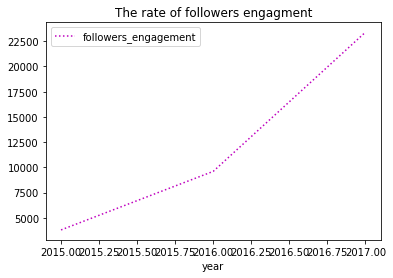

In [104]:
df_final.filter(['followers_engagement', 'year']).dropna().groupby(['year']).mean().plot(color="m", linestyle = 'dotted', title = 'The rate of followers engagment')